In [1]:
import sys
sys.path.insert(1, '../src/')
from scot import *
import scipy as sp
import numpy as np
import matplotlib.pylab as pl


# For optimal transport operations:
import ot
# For computing graph distances:
from scipy.sparse.csgraph import dijkstra
from scipy.sparse import csr_matrix
from sklearn.neighbors import kneighbors_graph

# For pre-processing, normalization
from sklearn.preprocessing import StandardScaler, normalize

import torch
from torch import nn, optim

In [2]:
def data_generator():
    
    # scrna=np.load("../../data/scrna_feat.npy")
    scrna=np.load("../data/scrna_feat.npy")
    
    # Define the logarithmic transformation function
    non_linear_trans = nn.Softplus()
    scatac = non_linear_trans(torch.tensor(scrna)).detach().numpy()
    print('scrna.shape: ', scrna.shape)
    print('')
    print('')
    print('scatac.shape:', scatac.shape)
    print('')
    print('')
    print('scrna:', scrna)
    print('')
    print('')
    print('scatac:', scatac)
    return scatac, scrna

In [3]:
X, y = data_generator()

scrna.shape:  (1047, 10)


scatac.shape: (1047, 10)


scrna: [[  6.6883364   -2.3696006    2.14278082 ...  -0.38985914   0.03180685
    0.16824296]
 [ -1.64704263   3.87629104  -2.57201982 ...  -0.56939318   0.77513025
    0.40657076]
 [ -3.22729615   4.55422489 -10.10911411 ...  -0.50277229   0.11965411
    0.70274427]
 ...
 [ -2.60360565   3.75489872  -6.05216412 ...   0.24619445  -1.72947077
   -3.24436   ]
 [ -0.94623495   4.54416359   2.29832621 ...   2.12374688  -1.05837995
    0.42656378]
 [ -2.49249336   4.43299686   1.91649138 ...   1.89995418  -2.62129623
    4.05023675]]


scatac: [[6.68958098e+00 8.94000856e-02 2.25372105e+00 ... 5.17097267e-01
  7.09177058e-01 7.80802708e-01]
 [1.76151488e-01 3.89680671e+00 7.36045937e-02 ... 4.48440760e-01
  1.15400753e+00 9.16954272e-01]
 [3.88981623e-02 4.56469256e+00 4.07060243e-05 ... 4.73031236e-01
  7.54762807e-01 1.10502057e+00]
 ...
 [7.13958207e-02 3.77803189e+00 2.35000142e-03 ... 8.23801811e-01
  1.63290152e-01 3.82524678e-02]


In [4]:
scot = SCOT(X,y)

In [5]:
scot.normalize(norm="l2")

In [6]:
scot.X

array([[9.21216265e-01, 1.23112065e-02, 3.10357927e-01, ...,
        7.12090061e-02, 9.76601439e-02, 1.07523649e-01],
       [3.96112496e-02, 8.76276351e-01, 1.65514919e-02, ...,
        1.00841038e-01, 2.59502096e-01, 2.06195843e-01],
       [7.73507098e-03, 9.07709231e-01, 8.09457231e-06, ...,
        9.40643457e-02, 1.50087910e-01, 2.19738210e-01],
       ...,
       [1.53319252e-02, 8.11315028e-01, 5.04652031e-04, ...,
        1.76907662e-01, 3.50658115e-02, 8.21454210e-03],
       [5.09658894e-02, 7.07715379e-01, 3.71983715e-01, ...,
        3.47539104e-01, 4.62866287e-02, 1.44348613e-01],
       [1.15167026e-02, 6.44207932e-01, 2.97659946e-01, ...,
        2.95572751e-01, 1.01725255e-02, 5.89523860e-01]])

In [7]:
scot.y

array([[ 0.89765423, -0.31802856,  0.28758665, ..., -0.05232373,
         0.00426886,  0.0225802 ],
       [-0.32220528,  0.75830548, -0.50315539, ..., -0.11138843,
         0.15163606,  0.07953604],
       [-0.27824717,  0.39265074, -0.87157556, ..., -0.04334742,
         0.0103162 ,  0.06058837],
       ...,
       [-0.25965798,  0.37447661, -0.60358324, ...,  0.02455301,
        -0.17248038, -0.32356051],
       [-0.14594818,  0.7008961 ,  0.35449601, ...,  0.32756873,
        -0.16324553,  0.0657936 ],
       [-0.30215984,  0.53740309,  0.23233231, ...,  0.23032754,
        -0.31777435,  0.49100187]])

In [8]:
X_graph, y_graph = scot.construct_graph(k=110)

In [9]:
D1, D2 = scot.init_distances()

In [10]:
D1

array([[0.  , 1.  , 1.  , ..., 0.75, 0.75, 0.75],
       [1.  , 0.  , 0.25, ..., 0.25, 0.5 , 0.5 ],
       [1.  , 0.25, 0.  , ..., 0.25, 0.5 , 0.5 ],
       ...,
       [0.75, 0.25, 0.25, ..., 0.  , 0.5 , 0.5 ],
       [0.75, 0.5 , 0.5 , ..., 0.5 , 0.  , 0.5 ],
       [0.75, 0.5 , 0.5 , ..., 0.5 , 0.5 , 0.  ]])

In [11]:
D2

array([[0.  , 1.  , 1.  , ..., 1.  , 0.75, 0.75],
       [1.  , 0.  , 0.25, ..., 0.25, 0.5 , 0.5 ],
       [1.  , 0.25, 0.  , ..., 0.25, 0.5 , 0.5 ],
       ...,
       [1.  , 0.25, 0.25, ..., 0.  , 0.75, 0.5 ],
       [0.75, 0.5 , 0.5 , ..., 0.75, 0.  , 0.5 ],
       [0.75, 0.5 , 0.5 , ..., 0.5 , 0.5 , 0.  ]])

In [12]:
p = ot.unif(X.shape[0])
q = ot.unif(y.shape[0])

In [13]:
experiment_epsilon = 1e-3

In [14]:
coupling, log= ot.gromov.entropic_gromov_wasserstein(D1, D2, p, q, loss_fun='square_loss', epsilon=experiment_epsilon, log=True, verbose=True)
gwdist=log['gw_dist']

It.  |Err         
-------------------
    0|1.615153e-03|


/Users/thnguy22/anaconda3/lib/python3.10/site-packages/ot/bregman.py:535: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|2.704171e-03|
   20|1.769955e-03|
   30|1.927748e-03|
   40|3.151458e-03|
   50|7.610061e-05|
   60|1.101749e-06|
   70|2.018132e-08|
   80|4.205549e-10|


In [15]:
# initialize SCOT object
original_scot=SCOT(X, y)
# call the alignment with l2 normalization 
# A few hyperparameter combinations yield the best result (FOSCTTM ~0.149) and one of them is the following:
X_new, y_new = original_scot.align(k=110, e=experiment_epsilon,  normalize=True, norm="l2")

It.  |Err         
-------------------
    0|1.615153e-03|


/Users/thnguy22/anaconda3/lib/python3.10/site-packages/ot/bregman.py:535: UserWarning: Sinkhorn did not converge. You might want to increase the number of iterations `numItermax` or the regularization parameter `reg`.
  warnings.warn("Sinkhorn did not converge. You might want to "


   10|2.704171e-03|
   20|1.769955e-03|
   30|1.927748e-03|
   40|3.151458e-03|
   50|7.610061e-05|
   60|1.101749e-06|
   70|2.018132e-08|
   80|4.205549e-10|


In [16]:
import evals 

# We will use the average FOSCTTM measure implemented in evals.py for evaluation (metric used in the publication Demetci et al 2021)
# This measure reports the fraction of samples closer to a sample than its true match (FOSCTTM), averaged over all samples. 
fracs=evals.calc_domainAveraged_FOSCTTM(X_new, y_new)
print("Average FOSCTTM score for this alignment with X onto Y is: ", np.mean(fracs))

Average FOSCTTM score for this alignment with X onto Y is:  0.016613980397420656


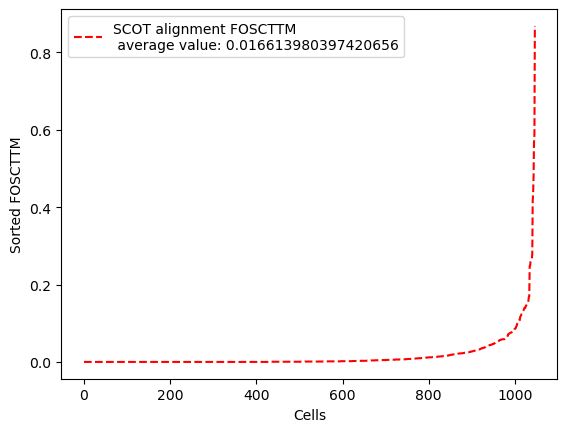

In [17]:
#Plotting sorted FOSCTTM to show the distributions of FOSCTTM across cells:

import matplotlib.pyplot as plt
legend_label="SCOT alignment FOSCTTM \n average value: "+str(np.mean(fracs)) #Put average FOSCTTM in the legend
plt.plot(np.arange(len(fracs)), np.sort(fracs), "r--", label=legend_label)
plt.legend()
plt.xlabel("Cells")
plt.ylabel("Sorted FOSCTTM")
plt.show()

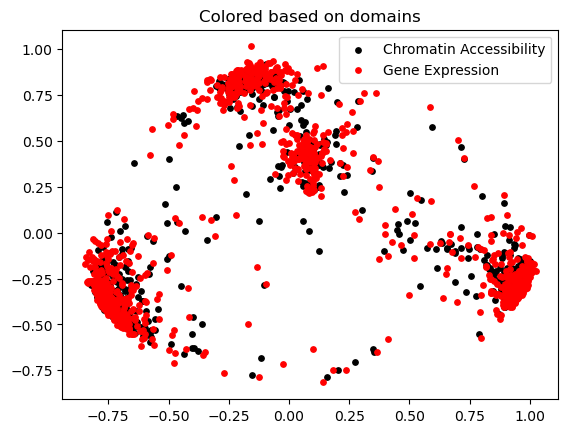

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Reduce the dimensionality of the aligned domains to two (2D) via PCA for the sake of visualization:
pca=PCA(n_components=2)
Xy_pca=pca.fit_transform(np.concatenate((X_new, y_new), axis=0))
X_pca=Xy_pca[0: 1047,]
y_pca=Xy_pca[1047:,]

#Plot aligned domains, samples colored by domain identity:
plt.scatter(X_pca[:,0], X_pca[:,1], c="k", s=15, label="Chromatin Accessibility")
plt.scatter(y_pca[:,0], y_pca[:,1], c="r", s=15, label="Gene Expression")
plt.legend()
plt.title("Colored based on domains")
plt.show()

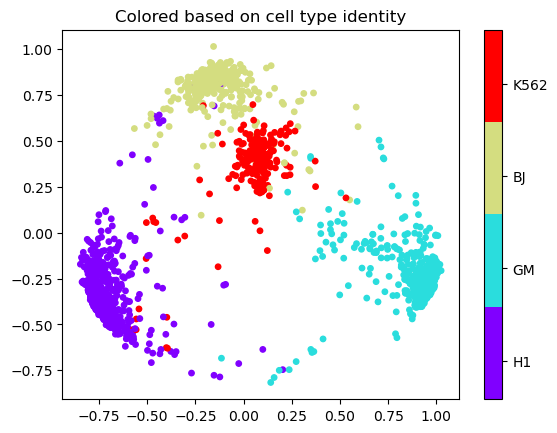

In [19]:
#Plot aligned domains, samples colored by cell types:
cellTypes_atac=np.loadtxt("../data/SNAREseq_atac_types.txt")
cellTypes_rna=np.loadtxt("../data/SNAREseq_rna_types.txt")

colormap = plt.get_cmap('rainbow', 4) 
plt.scatter(X_pca[:,0], X_pca[:,1], c=cellTypes_atac, s=15, cmap=colormap)
plt.scatter(y_pca[:,0], y_pca[:,1], c=cellTypes_rna, s=15, cmap=colormap)
# plt.colorbar()
cbar=plt.colorbar()

# approximately center the colors on the colorbar when adding cell type labels
tick_locs = (np.arange(1,5)+0.75) *3/4 
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(["H1", "GM", "BJ", "K562"]) #cell-type labels
plt.title("Colored based on cell type identity")
plt.show()



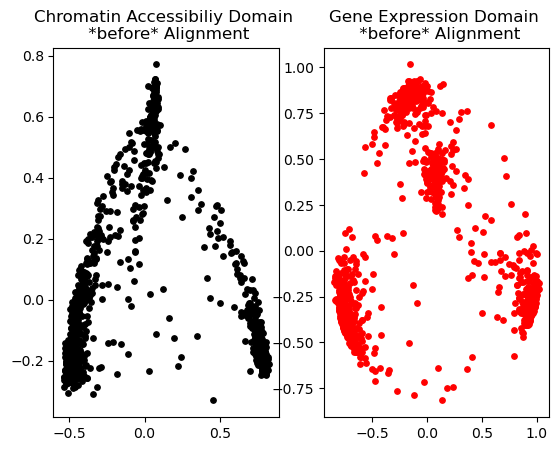

In [20]:
originalX_pca=pca.fit_transform(original_scot.X)
originaly_pca=pca.fit_transform(original_scot.y)

#Visualization of the global geometry
fig, (ax1, ax2)= plt.subplots(1,2)
ax1.scatter(originalX_pca[:,0], originalX_pca[:,1], c="k", s=15)
ax1.set_title("Chromatin Accessibiliy Domain \n *before* Alignment")
ax2.scatter(originaly_pca[:,0], originaly_pca[:,1], c="r", s=15)
ax2.set_title("Gene Expression Domain \n *before* Alignment")
plt.show()

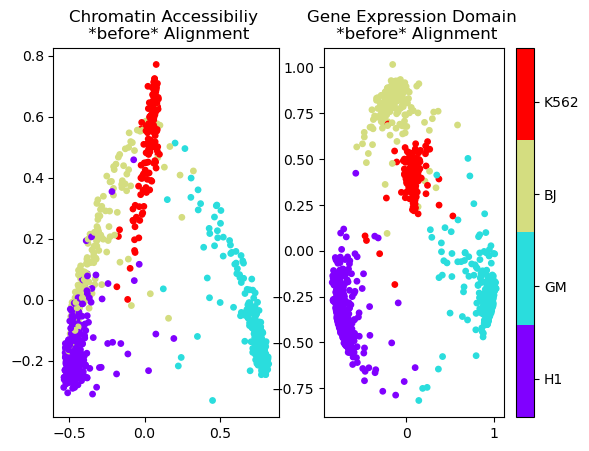

In [21]:
#Visualization of the cell type clusters in original domains *before* alignment
fig, (ax1, ax2)= plt.subplots(1,2)

fig1= ax1.scatter(originalX_pca[:,0], originalX_pca[:,1], c=cellTypes_atac, s=15, cmap=colormap)
ax1.set_title("Chromatin Accessibiliy \n *before* Alignment")

fig2= ax2.scatter(originaly_pca[:,0], originaly_pca[:,1],  c=cellTypes_rna, s=15, cmap=colormap)
ax2.set_title("Gene Expression Domain \n *before* Alignment")

cbar=fig.colorbar(fig2)
cbar.set_ticks(tick_locs)
cbar.set_ticklabels(["H1", "GM", "BJ", "K562"]) #cell-type labels